In [1]:
#Dependancies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df_a = pd.read_csv("./Resources/tech_layoffs.csv")

In [3]:
#Sort By 'Laid_off'
df_a = df_a.sort_values(by=['Laid_Off'], ascending=False)

In [4]:
# Drop all non USA countries
df_usa = df_a[df_a['Country'] == 'USA']

In [5]:
# compare companies with most layoff
# take top 5 companies compared to rest of the industry

# rename SaleSan Franciscoorce
df_usa.loc[df_usa['Company'] == 'SaleSan Franciscoorce', 'Company'] = 'Salesforce'

# groupby Company Layoffs
company_layoffs = df_usa.groupby('Company')['Laid_Off'].sum()
company_size_before = df_usa.groupby('Company')['Company_Size_before_Layoffs'].sum()
company_size_after = df_usa.groupby('Company')['Company_Size_after_layoffs'].sum()
usa_top_5_layoffs = company_layoffs.nlargest(5)
rest_companies = company_layoffs.drop(usa_top_5_layoffs.index)
rest_layoffs = rest_companies.sum()

top_5_size_before = company_size_before.loc[usa_top_5_layoffs.index]
top_5_size_after = company_size_after.loc[usa_top_5_layoffs.index]

# Get median values for rest of the companies
rest_size_before = company_size_before.loc[rest_companies.index].median()
rest_size_after = company_size_after.loc[rest_companies.index].median()

Loading the Dataset: The dataset is loaded using Pandas' read_csv() function.
Filtering by Country: The dataset is filtered to include only entries from the USA using boolean indexing.
Identifying Top Companies: The top 5 companies with the highest number of layoffs are determined using nlargest() function.

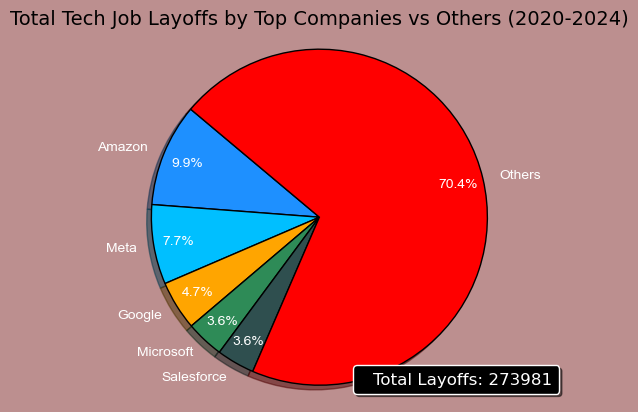

In [6]:
# Concatenate top 5 companies and the rest into a single Series
top_companies_and_rest = pd.concat([usa_top_5_layoffs, pd.Series(rest_layoffs, index=['Others'])])

# Plot the pie chart
plt.figure(facecolor='rosybrown')

# Define colors for the slices
colors = ['dodgerblue', 'deepskyblue', 'orange', 'seagreen', 'darkslategrey', 'red']

# Plot the pie chart
pie = plt.pie(top_companies_and_rest,
              labels=top_companies_and_rest.index,
              autopct='%1.1f%%',  # Display percentages
              startangle=140,
              shadow=True,
              colors=colors,
              pctdistance=0.85,
              wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
              textprops={'rotation': 0, 'fontname': 'Arial', 'color': 'White'}
              )

plt.title('Total Tech Job Layoffs by Top Companies vs Others (2020-2024)', fontsize=14)
plt.axis('equal')

# Set the color of the legend marker to black
plt.legend([f'Total Layoffs: {company_layoffs.sum()}'],
           loc='lower right',
           handlelength=0,
           fontsize='large',
           facecolor='black',
           edgecolor='white',
           labelcolor='white',
           shadow=True
           )

plt.show()


The pie chart visually represents the proportion of layoffs attributed to the top 5 companies compared to the rest of the industry. Each slice of the pie corresponds to a company, with the 'Others' category representing the cumulative layoffs of all other companies. Percentages are displayed on each slice, indicating the proportion of total layoffs.

Code Overview:
The layoffs of all other companies are summed and grouped under a category called 'Others'.
The pie chart is plotted using matplotlib's pie() function, with customizations for colors, labels, and percentage display.

'autopct='%1.1f%%''
    This parameter formats the display of percentages on each slice of the pie chart. The %1.1f%% format string ensures that percentages are displayed with one decimal place.

'startangle=140'
    This parameter specifies the angle at which the first slice of the pie chart starts. In this case, it starts at an angle of 140 degrees, which rotates the pie chart counterclockwise.

'shadow=True'
This parameter adds a shadow effect to the pie chart, giving it a three-dimensional appearance.

'pctdistance=0.85'
    This parameter specifies the distance of the percentage labels from the center of each slice, as a fraction of the radius of the pie. A value of 0.85 places the labels closer to the edge of each slice.

'wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}'
    This parameter specifies properties of the wedges (slices) of the pie chart, such as the edge color, line width, and antialiasing. In this case, the edges are colored black with a linewidth of 1, and antialiasing is enabled to smooth the edges.

'textprops={'rotation': 0, 'fontname': 'Arial', 'color': 'White'}'
    This parameter specifies properties of the text labels on the pie chart, such as rotation, font name, and color. In this case, the text is not rotated, the font is set to Arial, and the color is white.

In [7]:
plt.savefig('pie_chart_layoffs.png')

<Figure size 640x480 with 0 Axes>

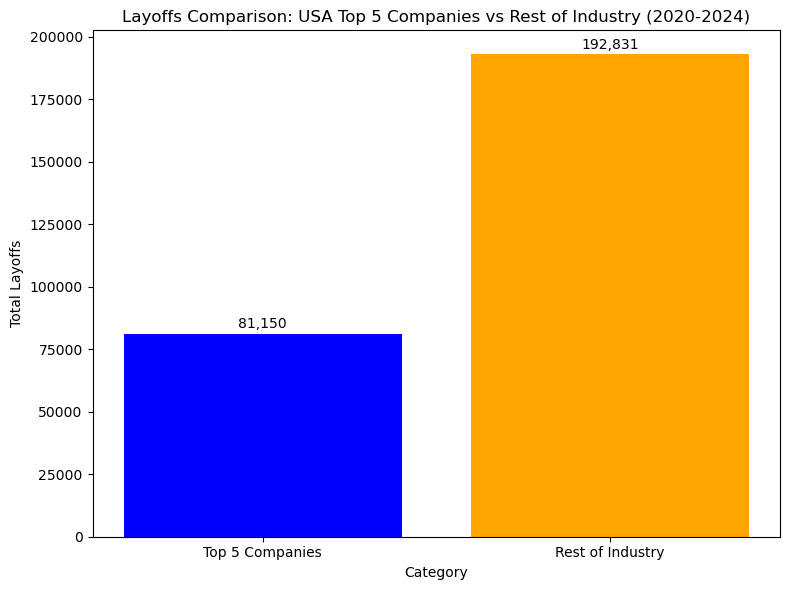

In [8]:
# Calculate the combined total of the top 5 companies
top_5_total = usa_top_5_layoffs.sum()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Top 5 Companies', 'Rest of Industry'], [top_5_total, rest_layoffs], color=['blue', 'orange'])
plt.title('Layoffs Comparison: USA Top 5 Companies vs Rest of Industry (2020-2024)')
plt.xlabel('Category')
plt.ylabel('Total Layoffs')
plt.tight_layout()

# Adding data labels above each bar
for i, total in enumerate([top_5_total, rest_layoffs]):
    plt.text(i, total + 1000, f"{total:,}", ha='center', va='bottom')

plt.show()

In [9]:
plt.savefig('T5_V_Rest_Bar.png')

<Figure size 640x480 with 0 Axes>

Plot a bar chart using matplotlib, with two bars representing the top 5 companies and the rest of the industry.

The bar chart is plotted using matplotlib's 'bar()' function, with two bars representing the top 5 companies and the rest of the industry. Data labels are added above each bar to display the exact number of layoffs using matplotlib's 'text()' function.

'for i, total in enumerate([top_5_total, rest_layoffs]):'
    This line iterates over a list containing the total number of layoffs for the top 5 companies ('top_5_total') and the rest of the companies ('rest_layoffs').
    The 'enumerate()' function is used to iterate over the list while also getting the index ('i') of each element.

'plt.text(i, total + 1000, f"{total:,}", ha='center', va='bottom')'
    This line adds a text label to the bar chart at position ('i, total + 1000'), where i is the index of the current element in the list, and 'total + 1000' is the y-coordinate adjusted to be slightly above the top of the bar.
    The 'f"{total:,}"' formats the total number with commas for better readability.
    'ha='center'' specifies that the text should be horizontally centered with respect to the given position.
    'va='bottom'' specifies that the text should be vertically aligned with its bottom edge at the given position.

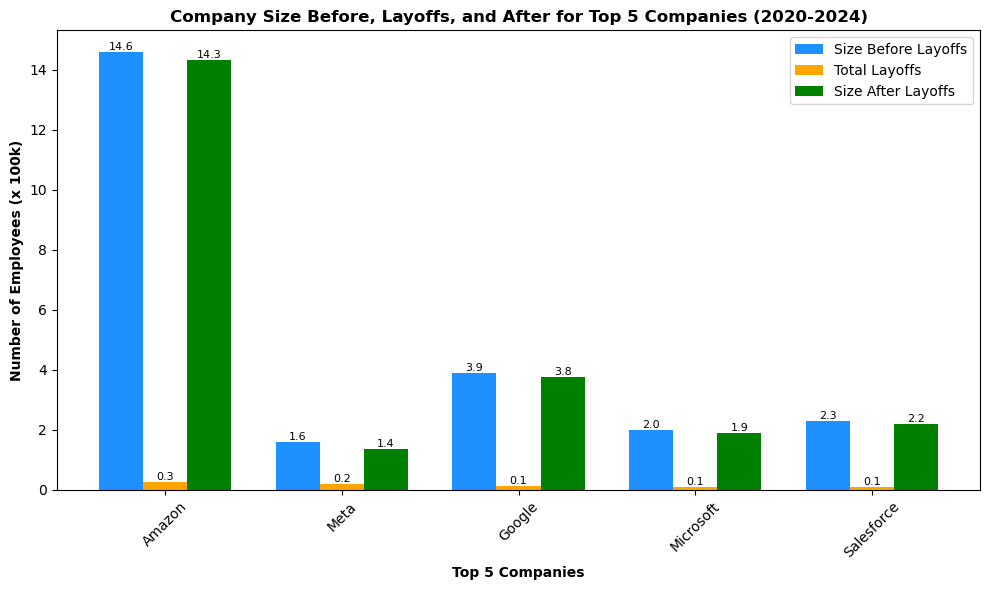

In [10]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Width of each bar
bar_width = 0.25

# Position of bars on x-axis
r1 = np.arange(len(usa_top_5_layoffs))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting bars for top 5 companies' size before layoffs
bars1 = plt.bar(r1, top_5_size_before / 100000, color='dodgerblue', width=bar_width, label='Size Before Layoffs')

# Plotting bars for total layoffs
bars2 = plt.bar(r2, usa_top_5_layoffs / 100000, color='orange', width=bar_width, label='Total Layoffs')

# Plotting bars for top 5 companies' size after layoffs
bars3 = plt.bar(r3, top_5_size_after / 100000, color='green', width=bar_width, label='Size After Layoffs')

# Adding labels to the bars
plt.xlabel('Top 5 Companies', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(usa_top_5_layoffs))], usa_top_5_layoffs.index, rotation=45)
plt.ylabel('Number of Employees (x 100k)', fontweight='bold')
plt.title('Company Size Before, Layoffs, and After for Top 5 Companies (2020-2024)', fontweight='bold')
plt.legend()

# Adding values above each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [11]:
plt.savefig('before_after_layoffs_bar.png')

<Figure size 640x480 with 0 Axes>

Another bar chart is created to illustrate the company size before layoffs, layoffs, and after layoffs for the top 5 companies.
For each company, three bars are plotted: size before layoffs, layoffs, and size after layoffs.
Matplotlib's bar() function is utilized to plot the bars, with appropriate customizations for colors, labels, and data display.
Data labels are added above each bar to display the exact size or number of layoffs.

`for bars in [bars1, bars2, bars3]:`
   This line iterates over a list containing the three sets of bars (`bars1`, `bars2`, `bars3`). Each set of bars corresponds to one of the following:
     `bars1`: Bars representing the size of companies before layoffs.
     `bars2`: Bars representing the number of layoffs.
     `bars3`: Bars representing the size of companies after layoffs.

`for bar in bars:`
   Within each set of bars, this line iterates over each individual bar.

`height = bar.get_height()`
    This line retrieves the height of the current bar, representing the value being visualized (size before layoffs, layoffs, or size after layoffs).

`plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)`
   This line adds a text label to the current bar at a position calculated based on the bar's width and height.
    `bar.get_x() + bar.get_width() / 2` calculates the x-coordinate for the center of the bar.
    `height` is used as the y-coordinate for the label.
    `f'{height:.1f}'` formats the height value to display with one decimal place for better readability.
    `ha='center'` specifies that the text should be horizontally centered with respect to the given position.
    `va='bottom'` specifies that the text should be vertically aligned with its bottom edge at the given position.
    `fontsize=8` sets the font size of the text label to 8 for consistency.

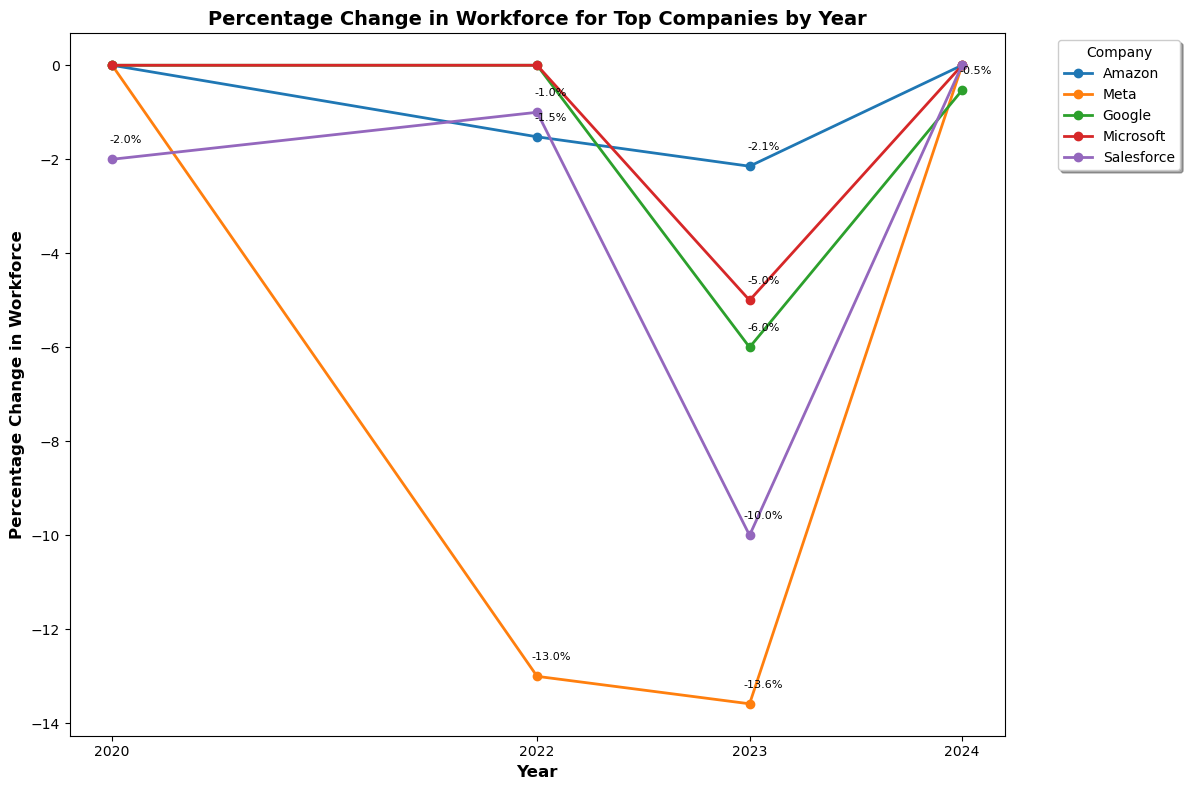

In [17]:
# Get the top companies
top_companies = usa_top_5_layoffs.index

# Filter the DataFrame to include only the top companies
df_top_companies = df_usa[df_usa['Company'].isin(top_companies)]

# Pivot the DataFrame to get the percentage of employees laid off each year for each company
df_pivot = df_top_companies.pivot_table(index='Company', columns='Year', values='Laid_Off', aggfunc='sum', fill_value=0)
df_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Calculate the percentage change in workforce for each company for each year
df_percentage_change_yearly = (
    (df_top_companies['Company_Size_after_layoffs'] 
    - df_top_companies['Company_Size_before_Layoffs'])/df_top_companies['Company_Size_before_Layoffs']
    )* 100

df_percentage_change_yearly = df_percentage_change_yearly.groupby(
    [df_top_companies['Company'],
     df_top_companies['Year']]
     ).mean().unstack(level=0)

# Fill missing values with 0
df_percentage_change_yearly = df_percentage_change_yearly.fillna(0)

# Set color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting the line chart for percentage change
plt.figure(figsize=(12, 8))
for idx, company in enumerate(top_companies):
    plt.plot(df_percentage_change_yearly.index, df_percentage_change_yearly[company], label=company, color=colors[idx], linewidth=2, marker='o')



# Adding labels for each point of change
for company in top_companies:
    for year, change in df_percentage_change_yearly[company].items():
        if change != 0:  # Add annotation only if there's a change
            plt.annotate(f'{change:.1f}%', xy=(year, change), xytext=(10, 10), textcoords='offset points', ha='center', va='bottom', fontsize=8, color='black')

# Adding labels and title
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Percentage Change in Workforce', fontweight='bold', fontsize=12)
plt.title('Percentage Change in Workforce for Top Companies by Year', fontweight='bold', fontsize=14)

# Adding legend with shadow and rounded corners
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True, fancybox=True)

plt.xticks(df_percentage_change_yearly.index[::])

plt.tight_layout()
plt.show()

In [14]:
plt.savefig('percentage_laid_off_by_year_line.png')

<Figure size 640x480 with 0 Axes>

A line chart is created to visualize the percentage change in workforce for each top company each year.
The percentage change in workforce for each company for each year is calculated.
Matplotlib's plot() function is used to plot the lines, with each line representing a company and each point indicating the percentage change in workforce for a specific year.
Data labels are added near each point to display the exact percentage change.

These lines of code perform two different operations:

Pivoting DataFrame to Calculate Percentage of Employees Laid Off Each Year for Each Company
   `df_top_companies.pivot_table(index='Company', columns='Year', values='Laid_Off', aggfunc='sum', fill_value=0)`
   This pivots the DataFrame `df_top_companies` to create a new DataFrame (`df_pivot`) where:
     Rows represent companies.
     Columns represent years.
     Values represent the total number of layoffs for each company in each year.
   `df_pivot.sum(axis=1)` calculates the sum of layoffs for each company across all years.
   `df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100` divides each value in `df_pivot` by the corresponding sum of layoffs for the company (across all years) and then multiplies by 100 to get the percentage of layoffs for each year for each company. This results in a DataFrame (`df_percentage`) containing the percentage of employees laid off each year for each company.

Calculating Percentage Change in Workforce for Each Company for Each Year
   `((df_top_companies['Company_Size_after_layoffs'] - df_top_companies['Company_Size_before_Layoffs']) / df_top_companies['Company_Size_before_Layoffs']) * 100`
   This calculates the percentage change in workforce for each company for each year. It subtracts the company size before layoffs from the company size after layoffs, divides by the company size before layoffs, and then multiplies by 100 to express the change as a percentage.
   
   `df_percentage_change_yearly.groupby([df_top_companies['Company'], df_top_companies['Year']]).mean().unstack(level=0)`
   This groups the calculated percentage changes by company and year, computes the mean change for each company in each year, and then unstacks the result to pivot the DataFrame, making years the columns and companies the rows. This results in a DataFrame (`df_percentage_change_yearly`) containing the average percentage change in workforce for each company for each year.


`for idx, company in enumerate(top_companies):`
   This line iterates over each company in the `top_companies` list, where `top_companies` contains the names of the top companies with the highest layoffs.
   `enumerate()` is used to iterate over the list while also obtaining the index (`idx`) of each element.

     `color=colors[idx]` assigns a color to the line based on the index of the company in the `top_companies` list.
